In this dataset we will try to answer few questions like: 
And try to do more insights and visualise the Data

1)What is the average revenue per country or lifetime retention based on country?

2) What do you think is the most popular device to watch Netflix?

3) What is Netflix’s Total Revenue generated?

4) Which age group uses Netflix the Most?

5) What are the Total watch hours?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from dateutil import relativedelta
import seaborn as sls
df=pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [9]:
# lets check for null values.
# lets correct column names also.
df.isnull().sum()
dict={'Monthly Revenue':'Monthly_Revenue','Last Payment Date':'Last_Payment_Date','Join Date':'Join_date',
      'User ID':'User_Id','Subscription Type':'Subscription_Type','Plan Duration':'Plan_duration'}
df.rename(columns=dict,
          inplace=True)
df.head() 
# converting string type data to integer values
df['Plan_duration']=df['Plan_duration'].str.extract('(\d+)').astype(int)

# Questions First

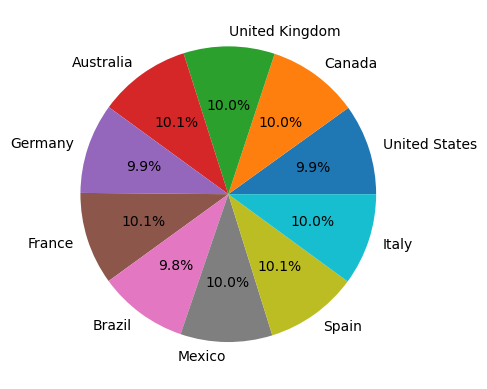

In [10]:
df['Total_revenue']= df['Monthly_Revenue'] * df['Plan_duration']
Total_revenue_country=df.groupby('Country').Total_revenue.mean()
countries=df['Country'].unique()
#This is monthly avg revenue 
plt.pie(Total_revenue_country,labels=countries,autopct='%1.1f%%')
plt.show()

In [11]:
# Moving on to Q2
devices=df['Device'].unique()
device_count=df.Device.value_counts()
device_count
# we can see that mainly 4 devices are used to stream netflix,and Laptop being most used.

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

We can See clearly that Although users are nearly equal across all devices,Still laptop is the most popular choice.
We will do a countrywise distribution among devices also in the plot below.

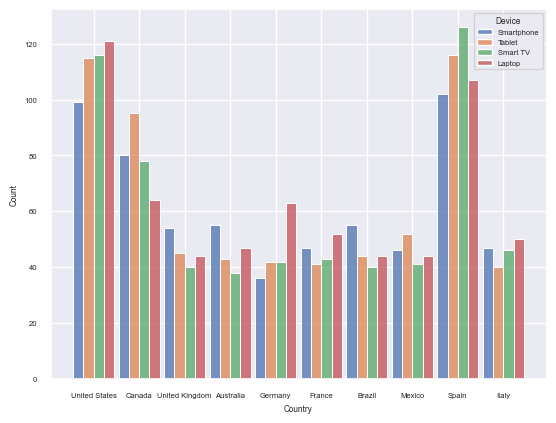

In [13]:
sls.histplot(x='Country',data=df, hue='Device',multiple='dodge',shrink=0.9)
sls.set(font_scale=0.5) 


You can clearly See though laptop tops among popular devices globally but its not the scene in every country.
Decision 1) Smart Tv sellers in Spain may try to contract some deal with netflix.
moving to Q3..

For total worldwide Revenue, we already have a column representing every countries total revenue, we will just add it.

In [14]:
Total_revenue_global=df['Total_revenue'].sum()
print(f'Total revenue generated by netflix worlwide is ${Total_revenue_global}')

Total revenue generated by netflix worlwide is $31271


Moving to Q4: 
Which Age-group uses the most?

<Axes: xlabel='Age', ylabel='Count'>

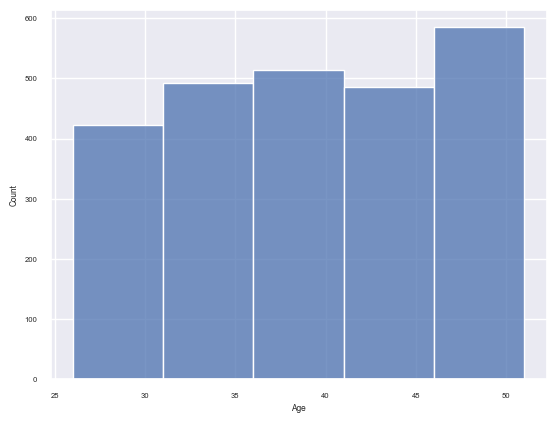

In [15]:
age_count=df.Age.value_counts()
age_count # This will give individual age counts(discrete data,which at the moment is not usefull)
sls.histplot(df.Age,binwidth=5) # you can define any bin width you want

So,we can say (35,45) if your desired range is 10 units of age else (45,50) if range is 5 units is the Ans to question 4

We will create a columm showing how much months a user used Netflix.

In [27]:
df['Join_date']=pd.to_datetime(df['Join_date'])
df['Last_Payment_Date']=pd.to_datetime(df['Last_Payment_Date'])
df['nb_months'] = ((df.Last_Payment_Date - df.Join_date  )/np.timedelta64(1, 'M'))
df['nb_months'] = df['nb_months'].astype(int)

In [28]:
plan_count=df.Subscription_Type.value_counts()
print(plan_count)
print(device_count)

Basic       999
Standard    768
Premium     733
Name: Subscription_Type, dtype: int64
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64


For Q5 we need to make certain assumptions.
we have 12 possible combinations.
let say:
    phone + basic= 28 hours a month
    phone + Standard= 20 hours a month
    phone + Premium= 24 hours a month
    Laptop + basic= 20 hours a month
    Laptop + Standard= 30 hours a month
    Laptop + Premium= 28 hours a month
    Tablet + basic= 20 hours a month
    Tablet + Standard= 24 hours a month
    Tablet + Premium= 16 hours a month
    Smart TV + basic= 28 hours a month
    Smart TV + Standard= 30 hours a month
    Smart TV + Premium= 28 hours a month
    

In [35]:
def watchtime(row):
    if (row['Device'] == 'Smartphone' and row['Subscription_Type']=='Basic'):
        return 28
    if (row['Device'] == 'Smartphone' and row['Subscription_Type']=='Standard'):
        return 20
    if (row['Device'] == 'Smartphone' and row['Subscription_Type']=='Premium'):
        return 24
    if (row['Device'] == 'Laptop' and row['Subscription_Type']=='Basic'):
        return 20
    if (row['Device'] == 'Laptop' and row['Subscription_Type']=='Standard'):
        return 30
    if (row['Device'] == 'Laptop' and row['Subscription_Type']=='Premium'):
        return 28
    if (row['Device'] == 'Tablet' and row['Subscription_Type']=='Basic'):
        return 20
    if (row['Device'] == 'Tablet' and row['Subscription_Type']=='Standard'):
        return 24
    if (row['Device'] == 'Tablet' and row['Subscription_Type']=='Premium'):
        return 16
    if (row['Device'] == 'Smart TV' and row['Subscription_Type']=='Basic'):
        return 28
    if (row['Device'] == 'Smart TV' and row['Subscription_Type']=='Standard'):
        return 30
    if (row['Device'] == 'Smart TV' and row['Subscription_Type']=='Premium'):
        return 28
df['watch_hours']=df.apply(lambda row : watchtime(row), axis=1) 
df.head()
Total_watch_hrs=(df['nb_months']*df['watch_hours']).sum()
print(f'Total watch hours are {Total_watch_hrs}  which is equivalent to {Total_watch_hrs/8640} years')

Total watch hours are 622386  which is equivalent to 72.03541666666666 years


So,probably we can see how netflix can earn so much,as per some report in 2016,netflix reportedly earned 5 cents or 0.21 rupees per hour of streaming which has definately increased in recent years. considering 5 cents the revenue generated is nearly 1.25L and this is just the data of some 2500 people!!

 Also for sub part of Q1 the "lifetime retention based on country"  I'm not getting much idea how to do, still have tried what i found appropriate. 

Text(0.5, 1.0, 'Countries vs Retention rates 2022-2023')

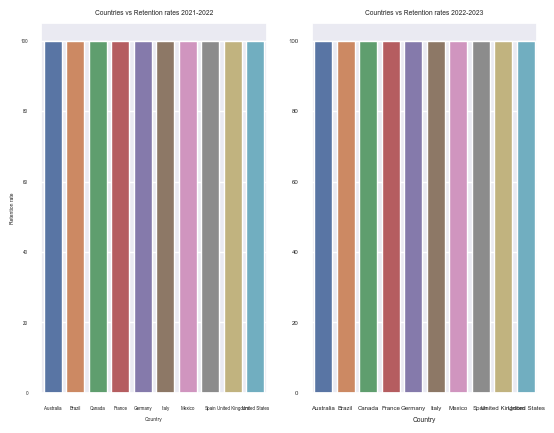

In [73]:
df.head()
def retention1(row):
    people_joined_2021=0
    people_retend_2021=0
    for j in df['Join_date']:
        if(int(j.strftime('%Y'))<2022):
            people_joined_2021+=1
    for i,j in zip(df['Join_date'],df['Last_Payment_Date']):
        if(int(j.strftime('%Y'))>2021  and int(i.strftime('%Y'))<2022 ):
            people_retend_2021+=1
    return (people_retend_2021/people_joined_2021)*100    
def retention2(row):
    people_joined_2022=0
    people_retend_2022=0
    for j in df['Join_date']:
        if(int(j.strftime('%Y'))<2023 and int(j.strftime('%Y'))>2021):
            people_joined_2022+=1
    for i,j in zip (df['Join_date'],df['Last_Payment_Date']):
        if(int(j.strftime('%Y'))>2022   and 2021<int(i.strftime('%Y'))<2023 ):
            people_retend_2022+=1
    return (people_retend_2022/people_joined_2022)*100
retention_countrywise_21_22=df.groupby('Country').apply(lambda row: retention1(row))
retention_countrywise_22_23=df.groupby('Country').apply(lambda row: retention2(row))
retention_countrywise_21_22.columns=['country','retentionpercent']
retention_countrywise_22_23.columns=['country','retentionpercent']
plt.subplot(1,2,1)
sls.barplot(x=retention_countrywise_21_22.index,y=retention_countrywise_21_22.values)
sls.set(font_scale=0.4)
plt.ylabel("Retention rate")
plt.title("Countries vs Retention rates 2021-2022")
plt.subplot(1,2,2)
sls.barplot(x=retention_countrywise_22_23.index,y=retention_countrywise_22_23.values)
sls.set(font_scale=0.4)
plt.title("Countries vs Retention rates 2022-2023")


So,You can see this is a great sign for the company as in all countries the retention rate is 100% since customers subscribed in 2021,2022 all have retended till 2023!